In [8]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

In [9]:
# Load movie data
data_path = "/Users/owen/src/Personal/dgbmh/data/movie_ids_09_01_2025.json"

# Try loading as standard JSON first, then as NDJSON if that fails
try:
    with open(data_path, 'r') as f:
        movie_data = json.load(f)
except json.JSONDecodeError:
    # If standard JSON fails, try loading as newline-delimited JSON (NDJSON)
    movie_data = []
    with open(data_path, 'r') as f:
        for line in f:
            if line.strip():  # Skip empty lines
                movie_data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(movie_data)
print(f"Loaded {len(df)} movies")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")
print(f"\nFirst few rows:")
df.head()

Loaded 1098100 movies
Columns: ['adult', 'id', 'original_title', 'popularity', 'video']
Data types:
adult                bool
id                  int64
original_title     object
popularity        float64
video                bool
dtype: object

First few rows:


,adult,id,original_title,popularity,video
0,False,3924,Blondie,0.3326,False
1,False,6124,Der Mann ohne Namen,1.4364,False
2,False,8773,L'Amour à vingt ans,5.1369,False
3,False,25449,New World Disorder 9: Never Enough,0.0429,False
4,False,31975,Sesame Street: Elmo Loves You!,0.0214,True


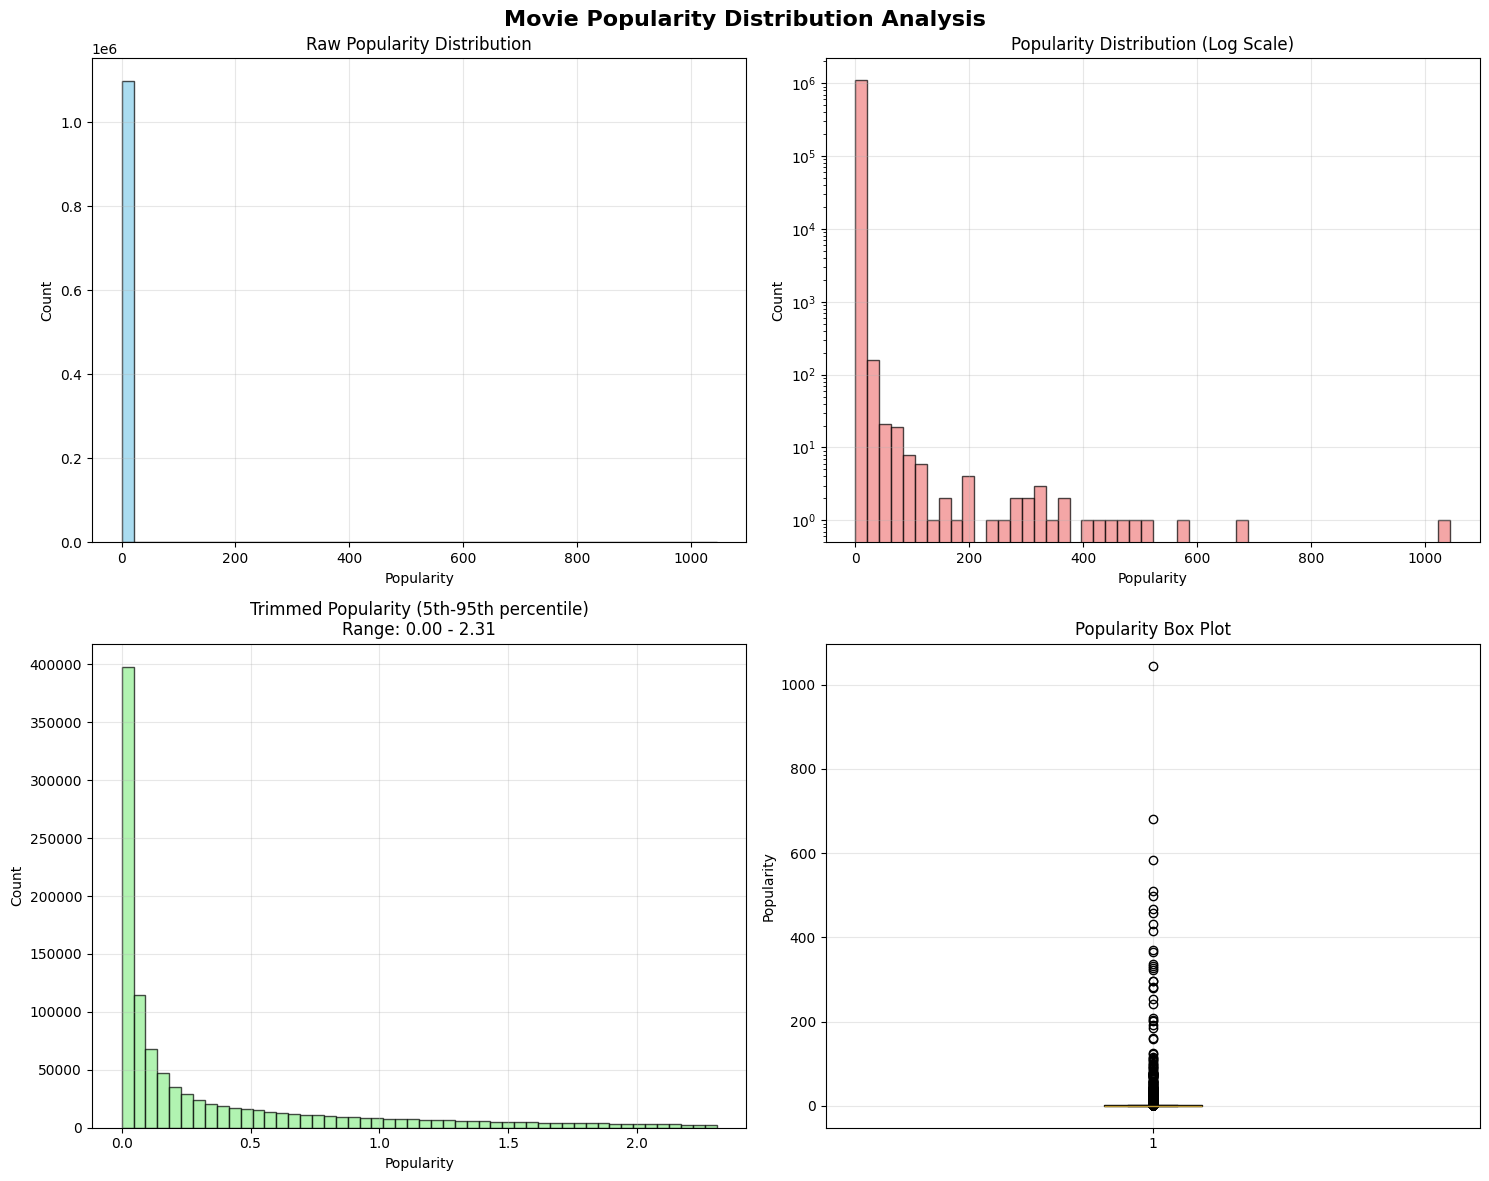


Popularity Statistics:
Count: 1,098,100
Mean: 0.54
Median: 0.11
Std Dev: 2.35
Min: 0.00
Max: 1045.17
5th percentile: 0.00
95th percentile: 2.31


In [10]:
# Create histogram of movie popularity
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Movie Popularity Distribution Analysis', fontsize=16, fontweight='bold')

# Extract popularity data
if 'popularity' in df.columns:
    popularity = df['popularity'].dropna()
else:
    # If popularity column doesn't exist, check for similar column names
    possible_cols = [col for col in df.columns if 'pop' in col.lower()]
    if possible_cols:
        popularity = df[possible_cols[0]].dropna()
        print(f"Using column: {possible_cols[0]}")
    else:
        print("No popularity column found. Available columns:", list(df.columns))
        popularity = None

if popularity is not None:
    # 1. Basic histogram
    axes[0, 0].hist(popularity, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Raw Popularity Distribution')
    axes[0, 0].set_xlabel('Popularity')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Log scale histogram (for better visualization of skewed data)
    axes[0, 1].hist(popularity, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Popularity Distribution (Log Scale)')
    axes[0, 1].set_xlabel('Popularity')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].set_yscale('log')
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Trimmed histogram (removing extreme outliers)
    q05, q95 = popularity.quantile([0.05, 0.95])
    popularity_trimmed = popularity[(popularity >= q05) & (popularity <= q95)]
    axes[1, 0].hist(popularity_trimmed, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title(f'Trimmed Popularity (5th-95th percentile)\nRange: {q05:.2f} - {q95:.2f}')
    axes[1, 0].set_xlabel('Popularity')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Box plot for additional insights
    box_plot = axes[1, 1].boxplot(popularity, patch_artist=True)
    box_plot['boxes'][0].set_facecolor('gold')
    axes[1, 1].set_title('Popularity Box Plot')
    axes[1, 1].set_ylabel('Popularity')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nPopularity Statistics:")
    print(f"Count: {len(popularity):,}")
    print(f"Mean: {popularity.mean():.2f}")
    print(f"Median: {popularity.median():.2f}")
    print(f"Std Dev: {popularity.std():.2f}")
    print(f"Min: {popularity.min():.2f}")
    print(f"Max: {popularity.max():.2f}")
    print(f"5th percentile: {q05:.2f}")
    print(f"95th percentile: {q95:.2f}")
else:
    print("Cannot create histogram: No popularity data found")

Finding the 10,000 most popular movies...
Top 10,000 movies selected from 1,098,100 total movies
Popularity range: 4.55 to 1045.17

Top 20 most popular movies:
 1. War of the Worlds                                  | Popularity: 1045.17 | ID: 755898
 2. F1                                                 | Popularity:  682.17 | ID: 911430
 3. Superman                                           | Popularity:  582.82 | ID: 1061474
 4. Eenie Meanie                                       | Popularity:  510.38 | ID: 1151334
 5. Mission: Impossible - The Final Reckoning          | Popularity:  499.28 | ID: 575265
 6. Together                                           | Popularity:  466.15 | ID: 1242011
 7. Jurassic World Rebirth                             | Popularity:  456.81 | ID: 1234821
 8. I Know What You Did Last Summer                    | Popularity:  430.93 | ID: 1083433
 9. 劇場版「鬼滅の刃」無限城編 第一章 猗窩座再来                            | Popularity:  416.08 | ID: 1311031
10. Red Sonja           

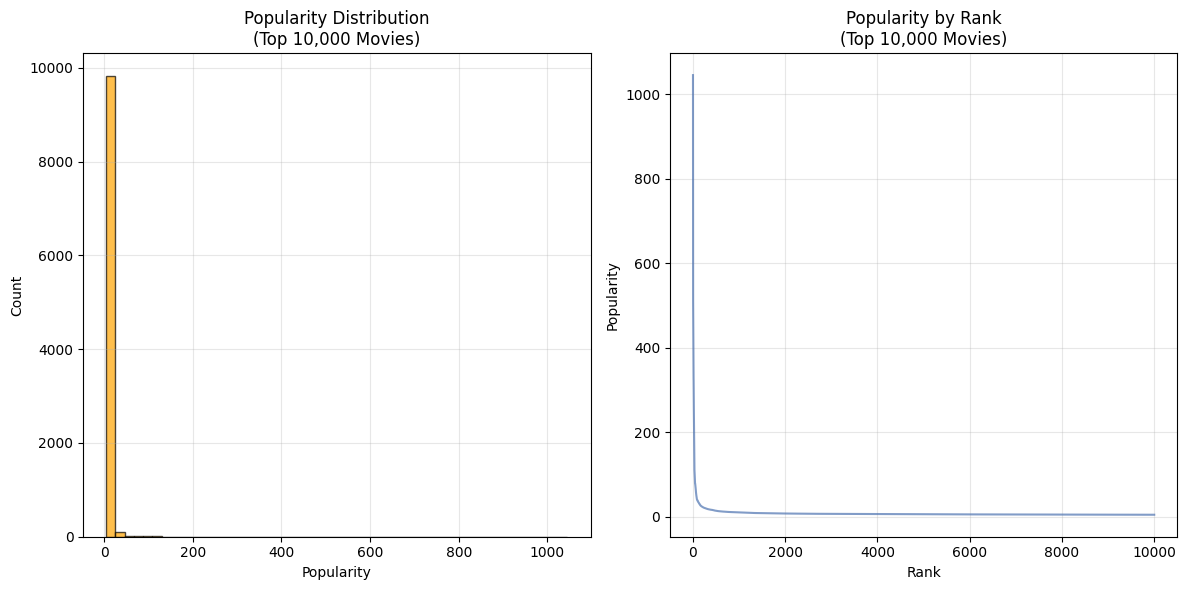


Variable 'top_10000_movies' created with the top 10,000 most popular movies.


In [12]:
# Get the 10,000 most popular movies
print("Finding the 10,000 most popular movies...")

# Sort by popularity in descending order and get top 10,000
top_10000_movies = df.nlargest(10000, 'popularity')

print(f"Top 10,000 movies selected from {len(df):,} total movies")
print(f"Popularity range: {top_10000_movies['popularity'].min():.2f} to {top_10000_movies['popularity'].max():.2f}")

# Display the top 20 for preview
print("\nTop 20 most popular movies:")
print("=" * 80)
for i, (idx, movie) in enumerate(top_10000_movies.head(20).iterrows(), 1):
    print(f"{i:2d}. {movie['original_title'][:50]:<50} | Popularity: {movie['popularity']:7.2f} | ID: {movie['id']}")

print("\n" + "=" * 80)
print(f"... and {len(top_10000_movies) - 20} more movies")

# Save to a new file for easy access
output_file = "/Users/owen/src/Personal/dgbmh/data/top_10000_popular_movies.json"
top_10000_movies.to_json(output_file, orient='records', indent=2)
print(f"\nTop 10,000 movies saved to: {output_file}")

# Show some statistics about the top 10,000
print(f"\nStatistics for top 10,000 movies:")
print(f"Mean popularity: {top_10000_movies['popularity'].mean():.2f}")
print(f"Median popularity: {top_10000_movies['popularity'].median():.2f}")
print(f"Min popularity (rank 10,000): {top_10000_movies['popularity'].min():.2f}")
print(f"Max popularity (rank 1): {top_10000_movies['popularity'].max():.2f}")

# Create a simple visualization of top 10,000 popularity distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(top_10000_movies['popularity'], bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Popularity Distribution\n(Top 10,000 Movies)')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, 10001), top_10000_movies['popularity'].values, 'b-', alpha=0.7)
plt.title('Popularity by Rank\n(Top 10,000 Movies)')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Store the result for further analysis
print(f"\nVariable 'top_10000_movies' created with the top 10,000 most popular movies.")

In [13]:
# Load and analyze actor/person data
print("Loading actor/person data...")

person_data_path = "/Users/owen/src/Personal/dgbmh/data/person_ids_09_01_2025.json"

# Try loading as standard JSON first, then as NDJSON if that fails
try:
    with open(person_data_path, 'r') as f:
        person_data = json.load(f)
except json.JSONDecodeError:
    # If standard JSON fails, try loading as newline-delimited JSON (NDJSON)
    person_data = []
    with open(person_data_path, 'r') as f:
        for line in f:
            if line.strip():  # Skip empty lines
                person_data.append(json.loads(line))

# Convert to DataFrame
df_persons = pd.DataFrame(person_data)
print(f"Loaded {len(df_persons)} persons/actors")
print(f"Columns: {list(df_persons.columns)}")
print(f"Data types:\n{df_persons.dtypes}")
print(f"\nFirst few rows:")
df_persons.head()

Loading actor/person data...
Loaded 4236937 persons/actors
Columns: ['adult', 'id', 'name', 'popularity']
Data types:
adult            bool
id              int64
name           object
popularity    float64
dtype: object

First few rows:


,adult,id,name,popularity
0,False,16767,Aki Kaurismäki,0.2821
1,False,54768,Turo Pajala,0.0817
2,False,54769,Susanna Haavisto,0.0843
3,False,4826,Matti Pellonpää,0.2745
4,False,54770,Eetu Hilkamo,0.0143


Finding the 1,000 most popular actors/persons...
Top 1,000 actors selected from 4,236,937 total persons
Popularity range: 2.93 to 24.56

Top 20 most popular actors/persons:
 1. Andrew V. McLaglen                                 | Popularity:   24.56 | ID: 51875
 2. Ashby Gentry                                       | Popularity:   17.97 | ID: 3664066
 3. Emily Blunt                                        | Popularity:   17.70 | ID: 5081
 4. Gary Oldman                                        | Popularity:   17.58 | ID: 64
 5. Martine Carol                                      | Popularity:   16.93 | ID: 29523
 6. Charles Durning                                    | Popularity:   16.54 | ID: 1466
 7. Samuel L. Jackson                                  | Popularity:   16.49 | ID: 2231
 8. Peter Stormare                                     | Popularity:   16.22 | ID: 53
 9. Ben Hardy                                          | Popularity:   15.71 | ID: 1452045
10. Sam Neill                  

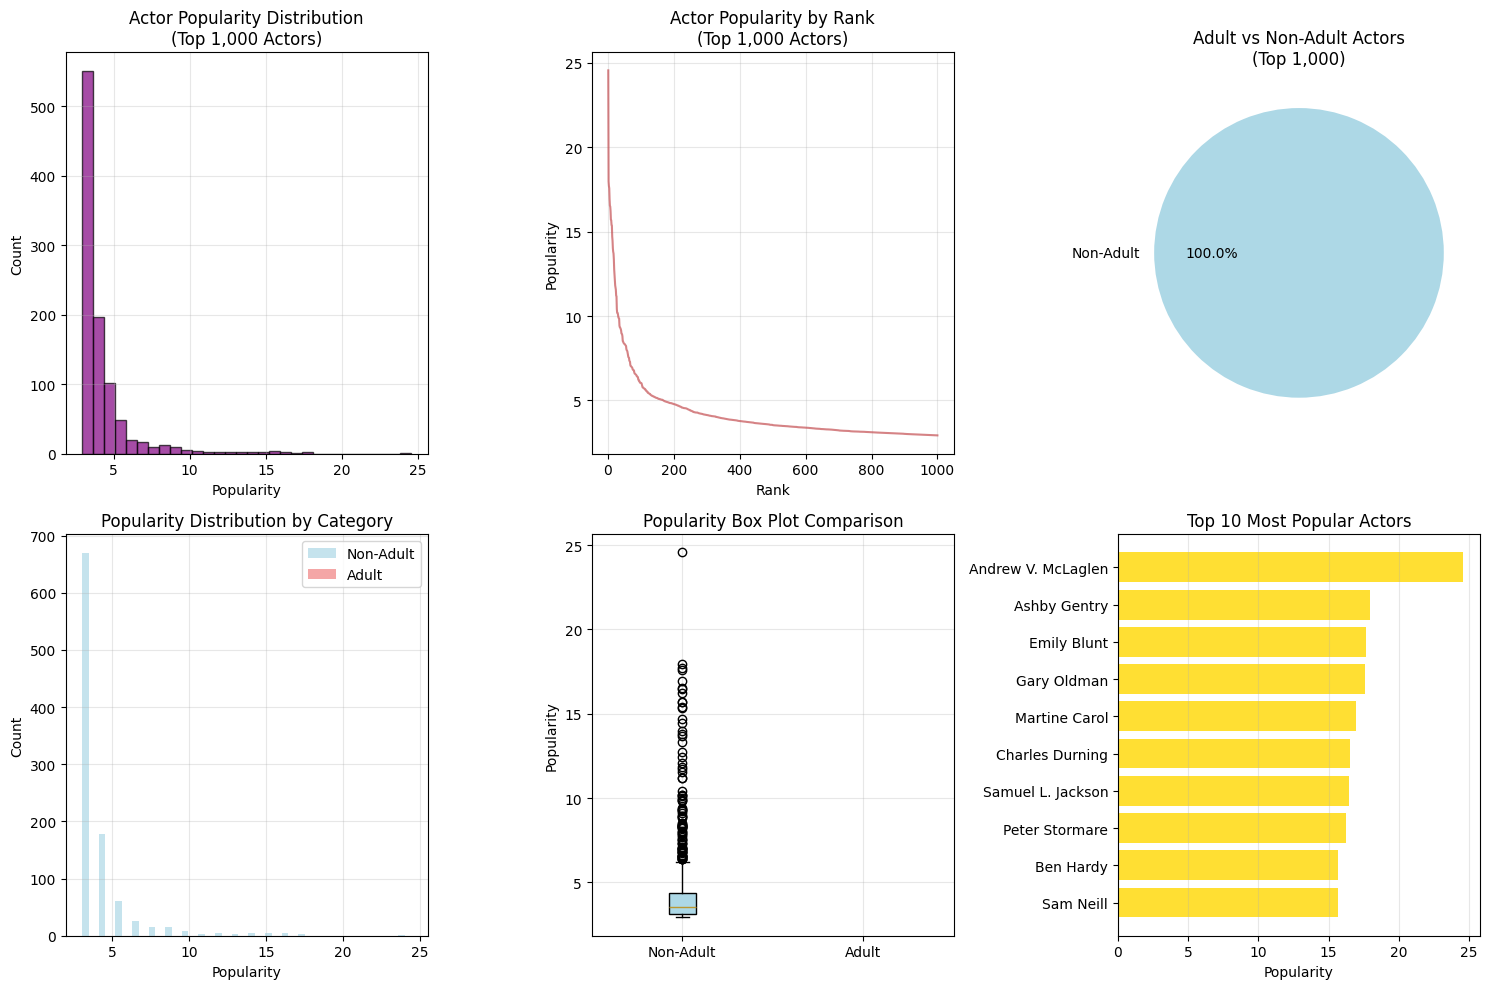


Variable 'top_1000_actors' created with the top 1,000 most popular actors.

Additional insights:
Insufficient data for adult/non-adult comparison


In [16]:
# Get the 1,000 most popular actors/persons
print("Finding the 1,000 most popular actors/persons...")

# Sort by popularity in descending order and get top 1,000
top_1000_actors = df_persons.nlargest(1000, 'popularity')

print(f"Top 1,000 actors selected from {len(df_persons):,} total persons")
print(f"Popularity range: {top_1000_actors['popularity'].min():.2f} to {top_1000_actors['popularity'].max():.2f}")

# Display the top 20 for preview
print("\nTop 20 most popular actors/persons:")
print("=" * 80)
for i, (idx, person) in enumerate(top_1000_actors.head(20).iterrows(), 1):
    adult_flag = " (Adult)" if person['adult'] else ""
    print(f"{i:2d}. {person['name'][:50]:<50} | Popularity: {person['popularity']:7.2f} | ID: {person['id']}{adult_flag}")

print("\n" + "=" * 80)
print(f"... and {len(top_1000_actors) - 20} more actors/persons")

# Save to a new file for easy access
output_file = "/Users/owen/src/Personal/dgbmh/data/top_1000_popular_actors.json"
top_1000_actors.to_json(output_file, orient='records', indent=2)
print(f"\nTop 1,000 actors saved to: {output_file}")

# Show some statistics about the top 1,000 actors
print(f"\nStatistics for top 1,000 actors:")
print(f"Mean popularity: {top_1000_actors['popularity'].mean():.2f}")
print(f"Median popularity: {top_1000_actors['popularity'].median():.2f}")
print(f"Min popularity (rank 1,000): {top_1000_actors['popularity'].min():.2f}")
print(f"Max popularity (rank 1): {top_1000_actors['popularity'].max():.2f}")
print(f"Adult content actors: {top_1000_actors['adult'].sum():,}")
print(f"Non-adult actors: {(~top_1000_actors['adult']).sum():,}")

# Create a simple visualization of top 1,000 actor popularity distribution
plt.figure(figsize=(15, 10))

# Main popularity analysis
plt.subplot(2, 3, 1)
plt.hist(top_1000_actors['popularity'], bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Actor Popularity Distribution\n(Top 1,000 Actors)')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.plot(range(1, 1001), top_1000_actors['popularity'].values, 'r-', alpha=0.7)
plt.title('Actor Popularity by Rank\n(Top 1,000 Actors)')
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.grid(True, alpha=0.3)

# Compare adult vs non-adult actors
plt.subplot(2, 3, 3)
adult_counts = top_1000_actors['adult'].value_counts()
labels = ['Non-Adult' if not idx else 'Adult' for idx in adult_counts.index]
plt.pie(adult_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral'])
plt.title('Adult vs Non-Adult Actors\n(Top 1,000)')

# Popularity comparison between adult and non-adult
plt.subplot(2, 3, 4)
adult_pop = top_1000_actors[top_1000_actors['adult']]['popularity']
non_adult_pop = top_1000_actors[~top_1000_actors['adult']]['popularity']
plt.hist([non_adult_pop, adult_pop], bins=20, alpha=0.7, 
         label=['Non-Adult', 'Adult'], color=['lightblue', 'lightcoral'])
plt.title('Popularity Distribution by Category')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)

# Box plot comparison
plt.subplot(2, 3, 5)
box_data = [non_adult_pop.values, adult_pop.values]
box_plot = plt.boxplot(box_data, tick_labels=['Non-Adult', 'Adult'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
if len(box_plot['boxes']) > 1:
    box_plot['boxes'][1].set_facecolor('lightcoral')
plt.title('Popularity Box Plot Comparison')
plt.ylabel('Popularity')
plt.grid(True, alpha=0.3)

# Top 10 actors bar chart
plt.subplot(2, 3, 6)
top_10 = top_1000_actors.head(10)
plt.barh(range(10), top_10['popularity'].values, color='gold', alpha=0.8)
plt.yticks(range(10), [name[:20] + '...' if len(name) > 20 else name for name in top_10['name'].values])
plt.xlabel('Popularity')
plt.title('Top 10 Most Popular Actors')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Store the result for further analysis
print(f"\nVariable 'top_1000_actors' created with the top 1,000 most popular actors.")

# Additional insights
print(f"\nAdditional insights:")
if len(adult_pop) > 0 and len(non_adult_pop) > 0:
    print(f"Average popularity - Non-adult actors: {non_adult_pop.mean():.2f}")
    print(f"Average popularity - Adult actors: {adult_pop.mean():.2f}")
else:
    print("Insufficient data for adult/non-adult comparison")